# Daily Tweets Monitoring
## Index:
1. Download of data
2. Data preparation
3. EDA
4. WordCloud
5. Sentiment Analysis
6. LDA Clustering
7. Distribution of tweets

 **Borrar credenciales**

In [27]:
import pandas as pd
import tweepy
from tqdm import tqdm, notebook
import seaborn as sns
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
from iso3166 import countries
import plotly.express as plotex
import re
from nltk.tokenize import TweetTokenizer
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

## 1. Download of data 

In [ ]:
auth = tweepy.OAuthHandler('API_KEY', 'API_SECRET')
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
start_date = '2020-12-04'
search_words = '#covid19 -filter:retweets'
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=start_date).items(10000)

In [ ]:
tweets_retrieve = []
for tweet in tqdm(tweets):
     tweets_retrieve.append(tweet)

## 2. Data preparation:

In [ ]:
df = pd.DataFrame()
for tweet in tqdm(tweets_retrieve):
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    
    df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                        'user_location': tweet.user.location,\
                                        'user_description': tweet.user.description,
                                        'user_created': tweet.user.created_at,
                                        'user_followers': tweet.user.followers_count,
                                        'user_friends': tweet.user.friends_count,
                                        'user_favourites': tweet.user.favourites_count,
                                        'user_verified': tweet.user.verified,
                                        'date': tweet.created_at,
                                        'text': text, 
                                        'hashtags': [hashtags if hashtags else None],
                                        'source': tweet.source,
                                        'is_retweet': tweet.retweeted}, index=[0]))

In [ ]:
df.to_csv('covid_tweets_10000.csv')

## 3. EDA:

In [2]:
df = pd.read_csv('covid_tweets_10000.csv', index_col=0)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,"Diana ""Sunshine"" Wulf","Nebraska, USA,",SHOW ME WHAT YOU GOT! ☀️🌖✨,2009-05-23 02:16:48,3489,608,29618,False,2020-12-04 13:13:30,"@PrisonPlanet Low-Level ""Marijuana Offenders"" ...",['COVID19'],Twitter Web App,False
0,Kanishka,Ranchi,Bicycle Mayor of Ranchi | Author - You & Me | ...,2009-06-27 11:53:29,1583,385,1858,False,2020-12-04 13:13:25,"@PrisonPlanet Low-Level ""Marijuana Offenders"" ...",['CoVID19'],Twitter for Android,False
0,Amesh Adalja,"Pittsburgh, Baltimore, NYC",Infectious disease MD (also CCM and EM)working...,2010-12-16 20:41:15,34992,2026,2490,True,2020-12-04 13:13:20,In this piece I’m quoted about the mind-boggli...,NaN,Twitter for iPhone,False
0,Dimitri Lascaris,"Montréal, Québec","Lawyer, journalist, activist and eco-socialist...",2010-11-12 01:32:04,7765,728,9344,False,2020-12-04 13:13:15,"Over a recent four-week period, the 20 Toronto...",NaN,Twitter for iPhone,False
0,sebszczepaniak,"Blonay, Suisse",Cycling enthusiast & Old school football fan.,2011-07-20 15:26:14,127,499,74,False,2020-12-04 13:13:15,A must see #diet #meat #health #COVID19 https:...,"['diet', 'meat', 'health', 'COVID19']",Twitter for iPhone,False


In [3]:
df.reset_index(inplace=True, drop=True)

In [4]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,"Diana ""Sunshine"" Wulf","Nebraska, USA,",SHOW ME WHAT YOU GOT! ☀️🌖✨,2009-05-23 02:16:48,3489,608,29618,False,2020-12-04 13:13:30,"@PrisonPlanet Low-Level ""Marijuana Offenders"" ...",['COVID19'],Twitter Web App,False
1,Kanishka,Ranchi,Bicycle Mayor of Ranchi | Author - You & Me | ...,2009-06-27 11:53:29,1583,385,1858,False,2020-12-04 13:13:25,"@PrisonPlanet Low-Level ""Marijuana Offenders"" ...",['CoVID19'],Twitter for Android,False
2,Amesh Adalja,"Pittsburgh, Baltimore, NYC",Infectious disease MD (also CCM and EM)working...,2010-12-16 20:41:15,34992,2026,2490,True,2020-12-04 13:13:20,In this piece I’m quoted about the mind-boggli...,NaN,Twitter for iPhone,False
3,Dimitri Lascaris,"Montréal, Québec","Lawyer, journalist, activist and eco-socialist...",2010-11-12 01:32:04,7765,728,9344,False,2020-12-04 13:13:15,"Over a recent four-week period, the 20 Toronto...",NaN,Twitter for iPhone,False
4,sebszczepaniak,"Blonay, Suisse",Cycling enthusiast & Old school football fan.,2011-07-20 15:26:14,127,499,74,False,2020-12-04 13:13:15,A must see #diet #meat #health #COVID19 https:...,"['diet', 'meat', 'health', 'COVID19']",Twitter for iPhone,False


In [5]:
df.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
9995,Nelson J. Otwoma,"Nairobi, Kenya","Based @NEPHAKKENYA, member, @gnpplus @wofakken...",2013-11-05 03:50:11,3470,3683,573,False,2020-12-04 06:09:11,6 days to #UHCDay #Bain of @Alfajiri is asking...,"['UHCDay', 'Bain', 'UHC']",Twitter for Android,False
9996,Burn-Out sous Toutenmakhron,NaN,RT ne veut pas dire soutien,2017-10-08 05:27:23,127,19,11342,False,2020-12-04 06:09:10,@black_to_fade @Psydonix @AnonDCC Check out Fa...,NaN,Twitter for Android,False
9997,AIR News Ranchi (#WearAMask #SaveLives),"Ranchi, India",Official Twitter account of Regional News Unit...,2017-03-24 10:08:36,2937,149,553,False,2020-12-04 06:09:08,#CoronaVirusUpdates:\n\n#COVID19 India Tracker...,"['CoronaVirusUpdates', 'COVID19']",Twitter Web App,False
9998,Ian Lyne,NaN,You Tube: https://t.co/p7ORCcGdm1\nArchive of ...,2020-11-10 06:49:19,2963,2391,4241,False,2020-12-04 06:09:08,@NeilClark66 \n@ClarkeMicah \n\nEXPLOSIVE! \n\...,NaN,Twitter Web App,False
9999,News Daily 24,"Guwahati, Assam",ND24 is a bilingual news web portal headquarte...,2020-03-15 09:50:14,590,178,4,False,2020-12-04 06:09:07,India’s active Caseload further dips to 4.35% ...,NaN,Twitter Web App,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         10000 non-null  object
 1   user_location     7933 non-null   object
 2   user_description  9382 non-null   object
 3   user_created      10000 non-null  object
 4   user_followers    10000 non-null  int64 
 5   user_friends      10000 non-null  int64 
 6   user_favourites   10000 non-null  int64 
 7   user_verified     10000 non-null  bool  
 8   date              10000 non-null  object
 9   text              10000 non-null  object
 10  hashtags          6984 non-null   object
 11  source            9985 non-null   object
 12  is_retweet        10000 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 879.0+ KB


In [7]:
## date to date-time format:
df['date'] = pd.to_datetime(df.date)
print(df.date.dtype)

datetime64[ns]


In [8]:
df['date'].iloc[0]

Timestamp('2020-12-04 13:13:30')

In [9]:

df['tweet_time'] = df.date.astype(str).str.split(expand=True)[1]

In [10]:
df.user_location.unique()

array(['Nebraska, USA,', 'Ranchi', 'Pittsburgh, Baltimore, NYC', ...,
       'Nagpur, Maharashtra, India', 'Bochum, Germany', 'Ottawa, Canada'],
      dtype=object)

In [11]:
len(df.user_location.unique())

3063

In [12]:
df.hashtags.unique()

array(["['COVID19']", "['CoVID19']", nan, ...,
       "['COVID19', 'Coronaviruspakistan']",
       "['Animals', 'BorisJohnson', 'Comedy', 'Covid19', 'Cure', 'Film', 'Indie', 'Meme', 'UK', 'Video', 'WebSeries']",
       "['UHCDay', 'Bain', 'UHC']"], dtype=object)

In [13]:
len(df.hashtags.unique())

3629

In [14]:
df.hashtags.value_counts()

['COVID19']                                                                                           1934
['Covid19']                                                                                            235
['covid19']                                                                                            112
['coronavirus', 'CoronaVirusUpdate', 'COVID19', 'CoronavirusPandemic']                                  54
['pmrdungun', 'japentrg', 'pkpp', 'tidakpastijangankongsi', 'kitajagakita', 'kitateguhkitamenang']      45
                                                                                                      ... 
['crowddfunding', 'gymnastics', 'ventilation', 'COVID19']                                                1
['Cainiao']                                                                                              1
['covid19', 'japan', 'virus']                                                                            1
['Biden', 'COVID19', 'fridaymorning']

In [15]:
hashtags_count_series = df.hashtags.value_counts()
print('Number of unique groups of hashtags',len(hashtags_count_series))
print('Number repeated groups of hashtags',len(hashtags_count_series[hashtags_count_series > 1]))

Number of unique groups of hashtags 3628
Number repeated groups of hashtags 397


In [16]:
df.date.min()

Timestamp('2020-12-04 06:09:07')

In [17]:
df.date.min()

Timestamp('2020-12-04 06:09:07')

/Users/germanpinzon/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/germanpinzon/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/germanpinzon/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 10024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/germanpinzon/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/germanpinzon/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/germanpinzon/anaconda3/lib/python3.7/site-p

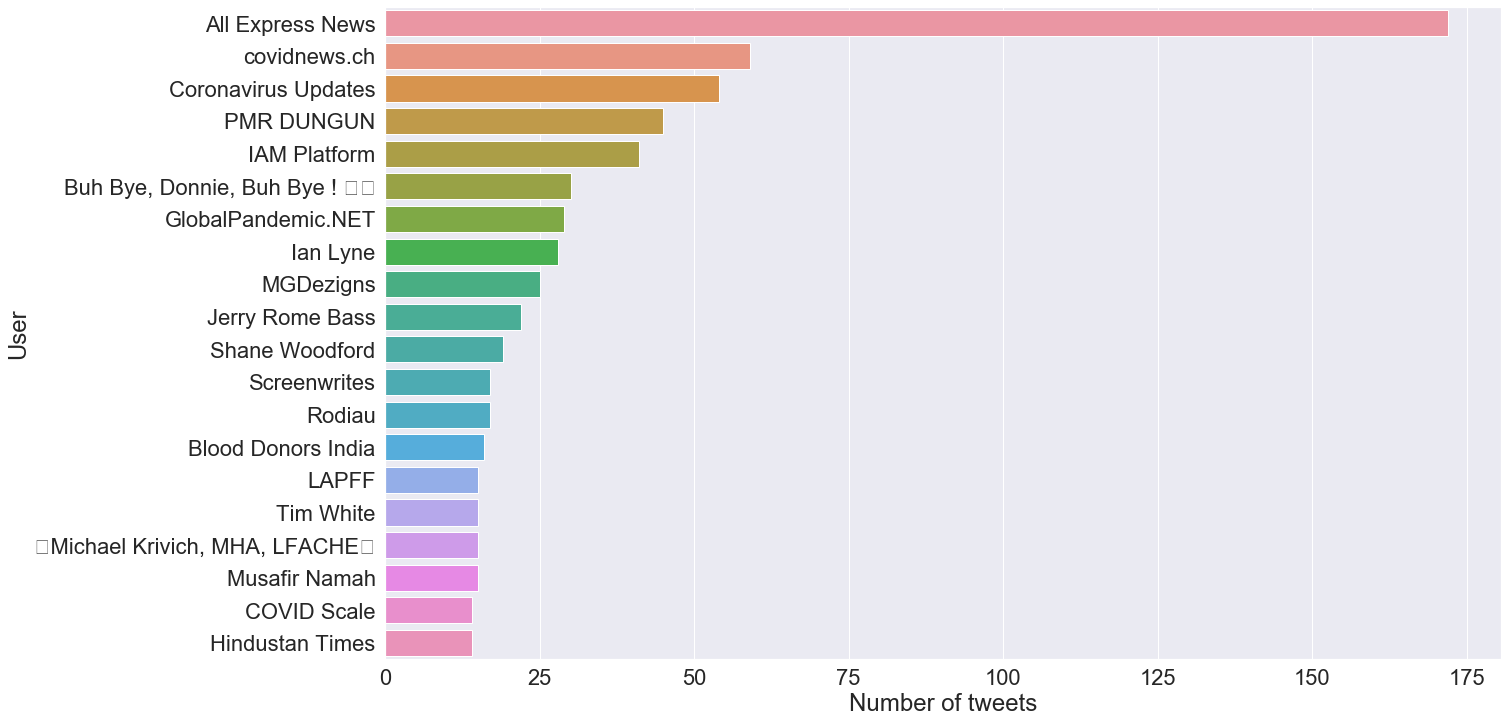

In [60]:
tweet_amount_series = df.user_name.value_counts().reset_index()
tweet_amount_series.columns = ['User', 'Number of tweets']
tweet_amount_series
plt.figure(figsize=(20,12))
sns.barplot(x='Number of tweets', y='User', data=tweet_amount_series.head(20))
sns.set(font_scale=1.5)
plt.show()

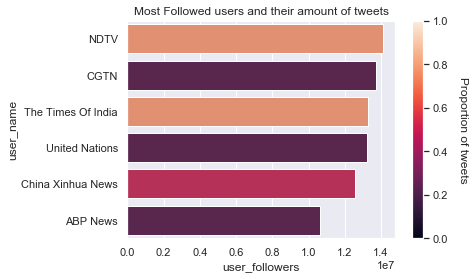

In [103]:
most_followed_series = df.sort_values('user_followers', ascending=False)
most_followed_series.drop_duplicates(subset='user_name')
tweet_amount_series.columns = ['user_name', 'Number of tweets']
most_followed_series = pd.merge(most_followed_series, tweet_amount_series, 'inner')

sns.set(font_scale=1)
normalized = plt.Normalize(most_followed_series['Number of tweets'].min(), most_followed_series['Number of tweets'].max())
scale = plt.cm.ScalarMappable(cmap='rocket')
scale.set_array([])
ax = sns.barplot(x="user_followers", y = "user_name", data = most_followed_series.head(20), hue = 'Number of tweets', dodge = False, palette = 'rocket')
ax.figure.colorbar(scale).set_label('Proportion of tweets', rotation=270, labelpad=20, y=0.5)
ax.legend(loc ='lower center').remove() 
plt.title('Most Followed users and their amount of tweets')
plt.show()

In [ ]:
#Part of day with most traffic

## 3. LDA Clustering

In [21]:
def clean_tweets(tweet):
    stop_words = set(stopwords.words('english'))
    clean_tweet = re.sub(r'@\w+',' ', tweet)
    clean_tweet = re.sub(r'<.*?>',' ', clean_tweet)
    clean_tweet = re.sub(r'http\S+', ' ', clean_tweet)
    clean_tweet = re.sub(r'\d+',' ', clean_tweet)
    clean_tweet = re.sub(r'#\w+',' ', clean_tweet)
    clean_tweet = tweet.split()
    clean_tweet = " ".join([word for word in clean_tweet if not word in stop_words])
    
    return clean_tweet

In [22]:
df['clean_text'] = df.text.apply(clean_tweets)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,tweet_time,clean_text
0,"Diana ""Sunshine"" Wulf","Nebraska, USA,",SHOW ME WHAT YOU GOT! ☀️🌖✨,2009-05-23 02:16:48,3489,608,29618,False,2020-12-04 13:13:30,"@PrisonPlanet Low-Level ""Marijuana Offenders"" ...",['COVID19'],Twitter Web App,False,13:13:30,"@PrisonPlanet Low-Level ""Marijuana Offenders"" ..."
1,Kanishka,Ranchi,Bicycle Mayor of Ranchi | Author - You & Me | ...,2009-06-27 11:53:29,1583,385,1858,False,2020-12-04 13:13:25,"@PrisonPlanet Low-Level ""Marijuana Offenders"" ...",['CoVID19'],Twitter for Android,False,13:13:25,"@PrisonPlanet Low-Level ""Marijuana Offenders"" ..."
2,Amesh Adalja,"Pittsburgh, Baltimore, NYC",Infectious disease MD (also CCM and EM)working...,2010-12-16 20:41:15,34992,2026,2490,True,2020-12-04 13:13:20,In this piece I’m quoted about the mind-boggli...,NaN,Twitter for iPhone,False,13:13:20,"In piece I’m quoted mind-boggling, insulting, ..."
3,Dimitri Lascaris,"Montréal, Québec","Lawyer, journalist, activist and eco-socialist...",2010-11-12 01:32:04,7765,728,9344,False,2020-12-04 13:13:15,"Over a recent four-week period, the 20 Toronto...",NaN,Twitter for iPhone,False,13:13:15,"Over recent four-week period, 20 Toronto neigh..."
4,sebszczepaniak,"Blonay, Suisse",Cycling enthusiast & Old school football fan.,2011-07-20 15:26:14,127,499,74,False,2020-12-04 13:13:15,A must see #diet #meat #health #COVID19 https:...,"['diet', 'meat', 'health', 'COVID19']",Twitter for iPhone,False,13:13:15,A must see #diet #meat #health #COVID19 https:...


In [24]:
corpus = list(df.clean_text)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
len(vectorizer.get_feature_names())

NameError: name 'CountVectorizer' is not defined

## 4. Tweet Location 

In [120]:
df.user_location.iloc[0]

'Nebraska, USA,'

In [183]:
df['country'] = df.user_location.str.split(',', expand=True)[1].str.strip()

In [184]:
df_loc = df.groupby(['tweet_time', 'location'])['user_name'].count().reset_index()
df_loc.rename(columns={'user_name':'quantity'}, inplace=True)
df_loc

,tweet_time,location,quantity
0,06:09:07,Assam,1
1,06:09:08,India,1
2,06:09:11,Kenya,1
3,06:09:14,WA,1
4,06:09:19,USA,1
...,...,...,...
3848,13:13:13,Kent,1
3849,13:13:15,Québec,1
3850,13:13:15,Suisse,1
3851,13:13:20,Baltimore,1


In [139]:
countries_dict = {}
for country in countries:
    countries_dict[country.name] = country.alpha3

countries_dict

{'Afghanistan': 'AFG',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia, Plurinational State of': 'BOL',
 'Bonaire, Sint Eustatius and Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory': 'IOT',
 'Brunei Darussalam': 'BRN',
 'Bulgaria': 'BGR',
 'Burkina Faso': 'BFA',
 'Burundi': 'BDI',
 'Cambodia': 'KHM',
 'Cameroon': 'CMR',
 'Canada': 'CAN',
 'Cabo Verde': 'CPV',
 'Cayman Islands': 'CYM',
 'Central African Republic': 'CAF',
 'Chad': 

In [185]:
df_loc['country_code'] = df_loc['location']
df_loc = df_loc.replace({'country_code': countries_dict})

In [186]:
df_loc

,tweet_time,location,quantity,country_code
0,06:09:07,Assam,1,Assam
1,06:09:08,India,1,IND
2,06:09:11,Kenya,1,KEN
3,06:09:14,WA,1,WA
4,06:09:19,USA,1,USA
...,...,...,...,...
3848,13:13:13,Kent,1,Kent
3849,13:13:15,Québec,1,Québec
3850,13:13:15,Suisse,1,Suisse
3851,13:13:20,Baltimore,1,Baltimore


In [190]:
us_list = ['United Kingdom', 'England', 'UK', 'United States']
df_loc = df_loc[(df_loc.country_code == 'USA')|(df_loc['location'].isin(us_list))|(df_loc.location != df_loc.country_code)]
df_loc = df_loc.groupby(['tweet_time', 'location', 'country_code'])['quantity'].sum().reset_index()
df_loc

,tweet_time,location,country_code,quantity
0,06:09:08,India,IND,1
1,06:09:11,Kenya,KEN,1
2,06:09:19,USA,USA,1
3,06:10:09,Canada,CAN,1
4,06:10:36,India,IND,1
...,...,...,...,...
2119,13:12:41,Australia,AUS,1
2120,13:12:43,United Kingdom,GBR,1
2121,13:12:47,Switzerland,CHE,1
2122,13:12:48,United Kingdom,GBR,1


In [191]:
df_loc.quantity.unique()

array([1, 2, 3])

In [192]:
fig = plotex.choropleth(
    df_loc, 
    locations='country_code',
    hover_name='location',
    color='quantity',
    animation_frame='tweet_time',
    projection="natural earth",
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Tweet Location through the day',
    width=800, 
    height=600
)
fig.show()